In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [55]:
X, Y= make_classification(n_samples=400,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=3,)

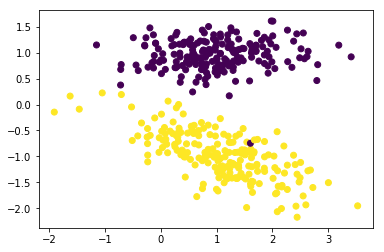

In [56]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [57]:

Y[Y==0]= -1


In [58]:
class SVM:
    def __init__(self, C= 1.0):
        self.W= 0 
        self.C= C 
        self.b= 0 
    def HingeLoss(self, X,Y,W, b):
        loss= 0.0
        loss+= 0.5*(np.dot(W,W.T))
        
        for i in range(X.shape[0]):
            ti= Y[i]*(np.dot(W,X[i].T) +b)
            loss+= self.C *max(0, 1-ti)
        
        return loss[0][0]
    def fit(self, X, Y, maxitr= 300, batch_size= 100, learning_rate=0.001):
        
        no_of_features=X.shape[1]
        no_of_examples= X.shape[0]
        
        # initializing the model parametres
        w= np.zeros((1,no_of_features))
        b= 0;
        c = self.C
        n= learning_rate
        print(self.HingeLoss(X,Y,w,b))
        losses= []
    
        for i in range(maxitr):
            
        
            loss= self.HingeLoss(X, Y, w, b)
            losses.append(loss)
            ids= np.arange(no_of_examples)
            np.random.shuffle(ids)
            for batch_start in range(0, no_of_examples, batch_size ):
                
                gradw=0
                gradb=0
                
                for j in range(batch_start, batch_start+ batch_size):
                    if(j<no_of_examples):
                        ind= ids[j]
                        ti= Y[ind]*(np.dot(w, X[ind].T) +b)
                        # Computing the gradients
                        if(ti>=1): # do nothing
                            gradw+= 0 
                            gradb+=0 
                        else :
                            gradw+= c*Y[ind]*X[ind]
                            gradb+= c*Y[ind]
                w= w -n*w +n*gradw
                b= b + n*gradb
                
        self.W= w
        self.b= b
        return w, b, losses
            
        
        
        

In [90]:
svm= SVM()
W, B, losses= svm.fit(X,Y, maxitr= 120)

400.0


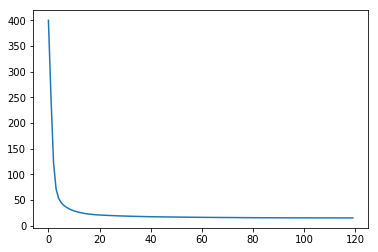

(1, 2) 0.39600000000000024


In [91]:
plt.plot(losses)
plt.show()
print(W.shape,B)

In [92]:
def hyperplane(w1, w2,B):
    x1= np.linspace(-2, 3,10 )
    x2= -(w1*x1 + B)/w2
    xp= -(w1*x1 + B+1)/w2
    xn= -(w1*x1 + B -1)/w2

    plt.figure(figsize=(12,12))
    plt.plot(x1, x2, color="blue", label="Hyperplane WX + B =0 ")
    plt.plot(x1, xp, color="green", label= "Hyperplane WX +B = 1")
    plt.plot(x1, xn, color="red", label = "Hyperplane WX + B = -1")
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.legend()
    plt.show()
    

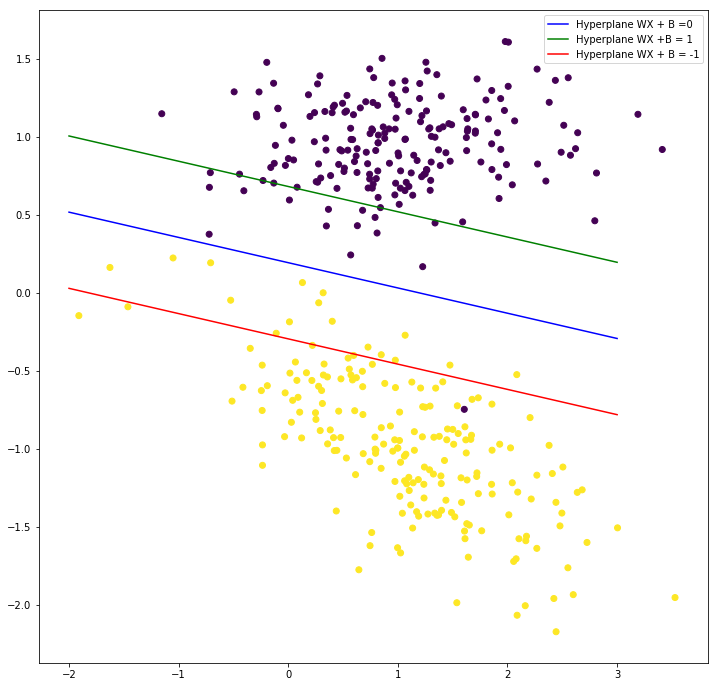

In [93]:
hyperplane(W[0][0], W[0][1], B)